## Set up

In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
# jupyter black formatter
%load_ext jupyter_black

import subprocess
import os
import sys

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "pirnns"))
print("Working directory: ", os.getcwd())

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)
sys.path.append(os.getcwd())
print("Directory added to path: ", os.getcwd())

Working directory:  /home/facosta/pirnns/pirnns
Directory added to path:  /home/facosta/pirnns
Directory added to path:  /home/facosta/pirnns/pirnns


## Load model

In [59]:
from pirnns.paper_figs.load_models import load_experiment_sweep
import torch

sweep_dir = (
    "/home/facosta/pirnns/pirnns/logs/experiments/timescales_sweep_20251002_055821"
)

device = "cuda" if torch.cuda.is_available() else "cpu"

models, metadata, summary = load_experiment_sweep(
    sweep_dir=sweep_dir,
    device=device,
    use_lightning_checkpoint=True,
    checkpoint_type="best",
)

Loading 1 experiments with 1 seeds each...
Total models to load: 1
Using Lightning checkpoints

Loading experiment: discrete_single_05
  ✓ Loaded discrete_single_05/seed_0

Successfully loaded: 1/1 models


### Load Position Decoding Measurement

In [63]:
from pirnns.analysis.measurements import PositionDecodingMeasurement

config = models["discrete_single_05"][0]["config"]

measurement = PositionDecodingMeasurement(config)

### Load OOD Trajectory Length Analysis

In [66]:
from pirnns.analysis.analyses import OODAnalysis

model = models["discrete_single_05"][0]["model"]

place_cell_centers = models["discrete_single_05"][0]["place_cell_centers"]

analysis = OODAnalysis(
    config, test_lengths=[20, 25, 50, 100], place_cell_centers=place_cell_centers
)
analysis.run(model, measurement)

AnalysisResult(test_conditions=[20, 25, 50, 100], measurements=[0.08945048522949219, 0.087663720703125, 0.10240396728515624, 0.1354678955078125], condition_name='trajectory_length', metadata={'training_length': 20, 'num_test_trajectories': 100})

In [65]:
models["discrete_single_05"][0]["position_decoding_errors"]["position_errors_epoch"][-1]

0.08473280212402344

## Sweep

In [3]:
from pirnns.paper_figs.load_models import load_experiment_sweep
import torch

sweep_dir = (
    "/home/facosta/pirnns/pirnns/logs/experiments/timescales_sweep_20251002_064332"
)

device = "cuda" if torch.cuda.is_available() else "cpu"

models, metadata, summary = load_experiment_sweep(
    sweep_dir=sweep_dir,
    device=device,
    use_lightning_checkpoint=True,
    checkpoint_type="best",
)

Loading 6 experiments with 4 seeds each...
Total models to load: 24
Using Lightning checkpoints

Loading experiment: discrete_single_05


  ✓ Loaded discrete_single_05/seed_0
  ✓ Loaded discrete_single_05/seed_1
  ✓ Loaded discrete_single_05/seed_2
  ✓ Loaded discrete_single_05/seed_3
Loading experiment: discrete_single_075
  ✓ Loaded discrete_single_075/seed_0
  ✓ Loaded discrete_single_075/seed_1
  ✓ Loaded discrete_single_075/seed_2
  ✓ Loaded discrete_single_075/seed_3
Loading experiment: discrete_single_1
  ✓ Loaded discrete_single_1/seed_0
  ✓ Loaded discrete_single_1/seed_1
  ✓ Loaded discrete_single_1/seed_2
  ✓ Loaded discrete_single_1/seed_3
Loading experiment: discrete_two
  ✓ Loaded discrete_two/seed_0
  ✓ Loaded discrete_two/seed_1
  ✓ Loaded discrete_two/seed_2
  ✓ Loaded discrete_two/seed_3
Loading experiment: discrete_four
  ✓ Loaded discrete_four/seed_0
  ✓ Loaded discrete_four/seed_1
  ✓ Loaded discrete_four/seed_2
  ✓ Loaded discrete_four/seed_3
Loading experiment: continuous_powerlaw_15
  ✓ Loaded continuous_powerlaw_15/seed_0
  ✓ Loaded continuous_powerlaw_15/seed_1
  ✓ Loaded continuous_powerlaw_15/

In [17]:
from pirnns.analysis.sweep_evaluator import SweepEvaluator
from pirnns.analysis.analyses import OODAnalysis
from pirnns.analysis.measurements import PositionDecodingMeasurement

evaluator = SweepEvaluator(
    analysis_class=OODAnalysis,
    analysis_params={
        "test_lengths": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 150, 200],
        "num_test_trajectories": 100,
    },
    measurement_class=PositionDecodingMeasurement,
    measurement_params={"decode_k": 3},
    verbose=True,
)


results = evaluator.evaluate(models)
evaluator.print_summary(results)

Evaluating 6 experiments
Analysis: OODAnalysis
Measurement: PositionDecodingMeasurement

Experiment: discrete_single_05
  Seeds: 4
  Processing seed 0...
    Results: [0.06564704895019531, 0.08066056823730469, 0.07773831176757813, 0.08580841827392578, 0.08624271850585938, 0.09032773844401042, 0.08810806710379464, 0.09531407165527343, 0.0932255859375, 0.09623526611328125, 0.1246513427734375, 0.162828515625, 0.1824843994140625]
  Processing seed 1...
    Results: [0.07497539520263671, 0.07002507781982421, 0.07663355000813803, 0.07890072631835937, 0.08525956420898438, 0.08196519470214844, 0.0839867902483259, 0.09456452941894532, 0.09234459092881944, 0.09596361694335938, 0.11798297119140624, 0.14422789713541667, 0.1957619384765625]
  Processing seed 2...
    Results: [0.07188163757324219, 0.07800590515136718, 0.07505907185872396, 0.08188078308105469, 0.0854848876953125, 0.09400439453125, 0.08802764020647322, 0.09144660186767578, 0.09757285563151041, 0.09844769287109376, 0.1234467529296875,

In [14]:
results.experiment_results

{'discrete_single_05': ExperimentResult(experiment_name='discrete_single_05', test_conditions=[20, 25, 50, 100], condition_name='trajectory_length', seed_results={0: [0.08364958190917969, 0.09168751220703125, 0.09637418823242187, 0.1268595947265625], 1: [0.0829014663696289, 0.08465821533203124, 0.10000484619140625, 0.1310650390625], 2: [0.08166808319091796, 0.08273886108398437, 0.10205675659179687, 0.1212662109375], 3: [0.08116899108886719, 0.0956142822265625, 0.0967335693359375, 0.13405107421875]}, mean_measurements=[0.08234703063964843, 0.08867471771240233, 0.09879234008789063, 0.12831047973632814], std_measurements=[0.000981425698891536, 0.005210594294265228, 0.0023565112755534775, 0.004802832818106393], config={'DoG': True, 'accelerator': 'gpu', 'activation': 'ReLU', 'arena_size': 2.2, 'batch_size': 1000, 'border_region': 0.03, 'decode_k': 3, 'devices': [0, 1, 2, 3], 'dt': 0.1, 'experiment_name': 'discrete_single_05', 'gamma': 0.5, 'hidden_size': 4096, 'input_size': 2, 'learning_ra

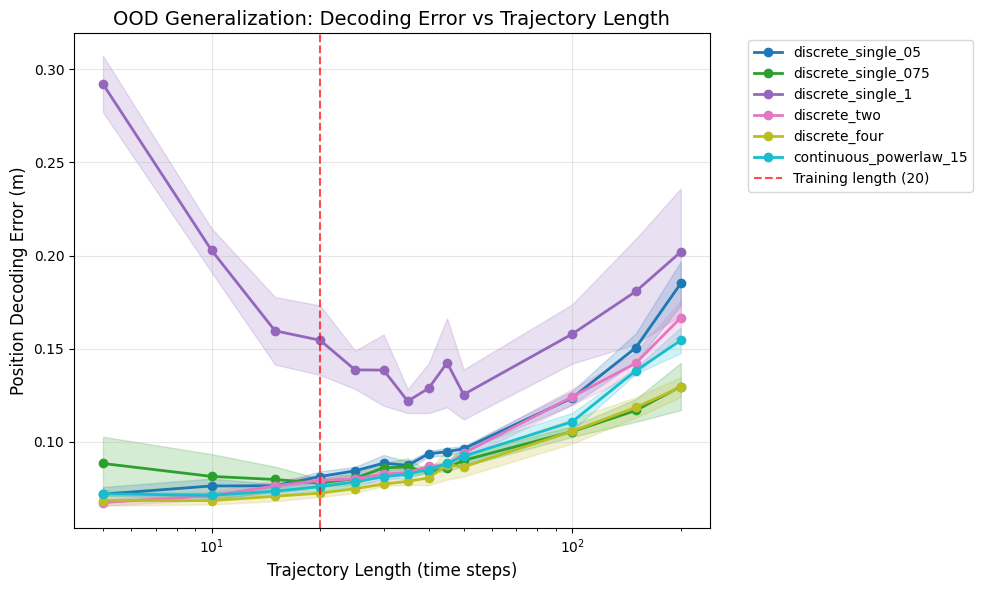

In [21]:
from pirnns.analysis.plotting import (
    plot_sweep_results_ood_trajectory_length_decoding_error,
)


plot_sweep_results_ood_trajectory_length_decoding_error(results)